In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_titanic=pd.read_csv('train.csv')

In [3]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_titanic.shape

(891, 12)

In [5]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_titanic.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [9]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df_titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

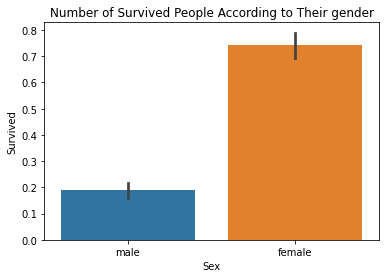

In [11]:
plt.title("Number of Survived People According to Their gender")
sns.barplot(x='Sex',y='Survived',data=df_titanic)
plt.show()

In [12]:
sum(df_titanic['Name'].duplicated())

0

In [13]:
df_titanic['Age'].fillna(df_titanic['Age'].mean(),inplace=True)
df_titanic['Age'].isnull().sum()

0

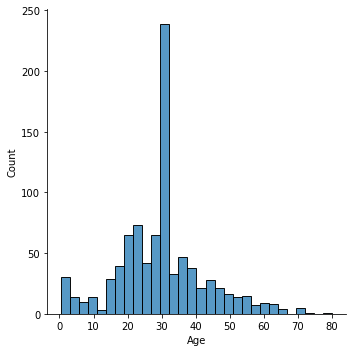

In [15]:
sns.displot(df_titanic.Age)
plt.show()

In [16]:
def age_bins(df_titanic):
    
    if df_titanic['Age']<=12:
        return 'child'
    elif (df_titanic['Age']<18):
        return 'Teenagers'
    elif (df_titanic['Age']>=18) & (df_titanic['Age']<30):
        return  'Youth '
    elif (df_titanic['Age']>=31) & (df_titanic['Age']<=50):
        return   'Adults'
    else :
        return 'Seniors '
    
df_titanic['age_bins']=df_titanic.apply(age_bins,axis=1)

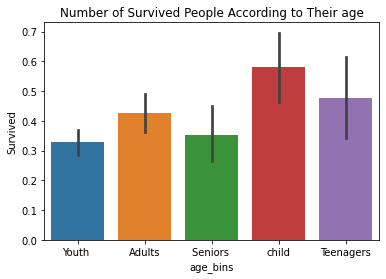

In [17]:
plt.title("Number of Survived People According to Their age")
sns.barplot(data=df_titanic,x='age_bins',y='Survived')
plt.show()

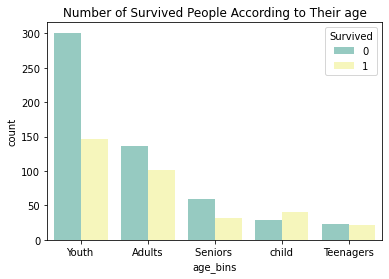

In [18]:
plt.title("Number of Survived People According to Their age")
sns.countplot(x='age_bins',hue='Survived',data=df_titanic,palette="Set3")
plt.show()

In [19]:
df_titanic['Embarked'].unique() 

array(['S', 'C', 'Q', nan], dtype=object)

In [20]:
df_titanic['Embarked'].fillna('S', inplace=True)

In [21]:
df_titanic.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Youth
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adults
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adults


In [23]:
def embarked_bins(df_titanic):
    if df_titanic['Embarked']=='S':
        return 'Southampton'
    elif df_titanic['Embarked']=='C':
        return 'Cherbourg'
    elif df_titanic['Embarked']=='Q':
        return 'Queenstown'
    
df_titanic['embarked_bins']=df_titanic.apply(embarked_bins,axis=1)

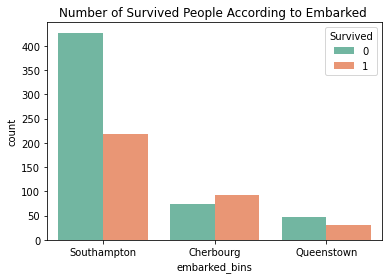

In [24]:
plt.title("Number of Survived People According to Embarked ")
sns.countplot(x='embarked_bins',hue='Survived',data=df_titanic,palette="Set2")
plt.show()

In [25]:
df_titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

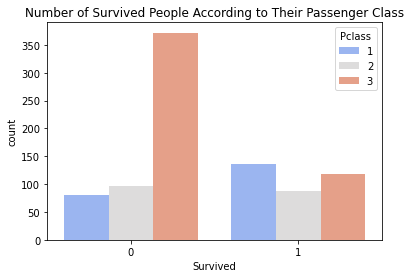

In [26]:
plt.title("Number of Survived People According to Their Passenger Class")
sns.countplot(x="Survived", hue = "Pclass", data = df_titanic,palette='coolwarm')
plt.show()

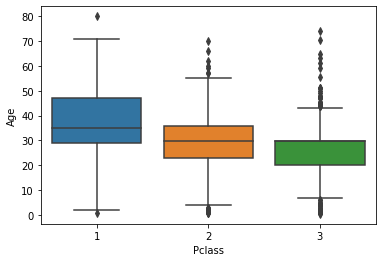

In [27]:
sns.boxplot(x=df_titanic.Pclass,y=df_titanic.Age)
plt.show()

In [28]:
def fare_bins(df_titanic):
    if df_titanic['Fare']<10:
        return 'Third Class'
    elif df_titanic['Fare']<15:
        return 'Second Class'
    elif (df_titanic['Fare']>30) & (df_titanic['Fare']<=150):
        return 'First Class Berth'
    else:
        return 'First-class parlor suite'
    
df_titanic['fare_bins']=df_titanic.apply(fare_bins,axis=1)

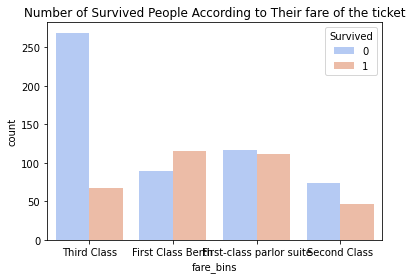

In [29]:
plt.title("Number of Survived People According to Their fare of the ticket")
sns.countplot(x='fare_bins',hue='Survived',data=df_titanic,palette='coolwarm')
plt.show()

In [30]:
df_titanic.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           0
age_bins           0
embarked_bins      0
fare_bins          0
dtype: int64

In [31]:
df_titanic=df_titanic.rename(columns={'Sex':'Gender'})

In [32]:
df_titanic = df_titanic.drop("Cabin", axis = 1)
df_titanic=df_titanic.drop("PassengerId",axis=1)

In [33]:
df_titanic.head()

,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked,age_bins,embarked_bins,fare_bins
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Youth,Southampton,Third Class
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adults,Cherbourg,First Class Berth
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Youth,Southampton,Third Class
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adults,Southampton,First Class Berth
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adults,Southampton,Third Class


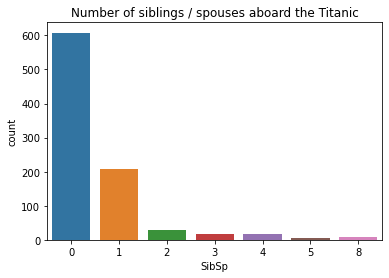

In [34]:
plt.title("Number of siblings / spouses aboard the Titanic")
sns.countplot(x=df_titanic.SibSp)
plt.show()

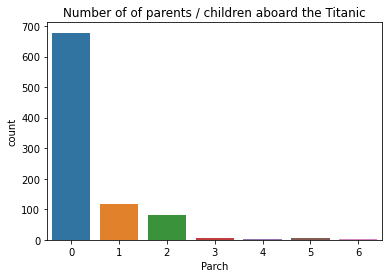

In [35]:
plt.title("Number of of parents / children aboard the Titanic")
sns.countplot(x=df_titanic.Parch)
plt.show()

In [36]:
df_titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<AxesSubplot:>

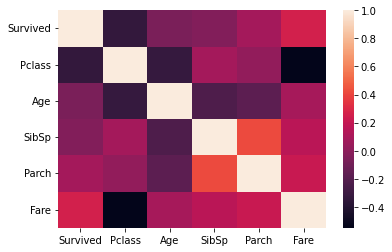

In [37]:
sns.heatmap(df_titanic.corr())